In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the TensorBoard notebook extension

In [10]:
df = pd.read_csv('all.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


0       0
1       0
2       0
3       0
4       0
       ..
2995    9
2996    9
2997    9
2998    9
2999    9
Name: 784, Length: 3000, dtype: int64

In [16]:
X = X.to_numpy()

In [17]:
y = y.to_numpy()

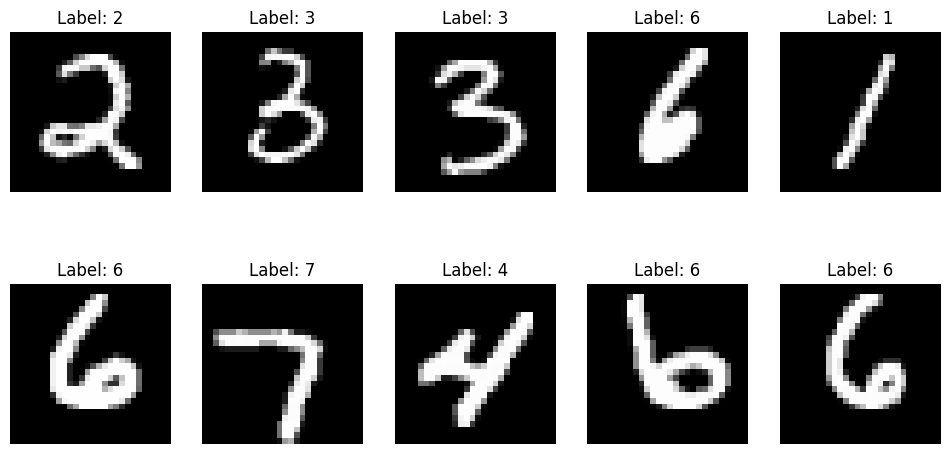

In [20]:


# Plot first 10 images with labels
plt.figure(figsize=(12, 6))
for i in range(10):
    r = np.random.randint(0,2500)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[r, :].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[r]}")
    plt.axis('off')

plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [23]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [24]:
np.shape(x_train)

(2400, 784)

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Epoch 1/10
75/75 [==============================] - 38s 19ms/step - loss: 0.6703 - accuracy: 0.7821
Epoch 2/10
75/75 [==============================] - 1s 19ms/step - loss: 0.2102 - accuracy: 0.9354
Epoch 3/10
75/75 [==============================] - 1s 20ms/step - loss: 0.1105 - accuracy: 0.9654
Epoch 4/10
75/75 [==============================] - 2s 26ms/step - loss: 0.0368 - accuracy: 0.9904
Epoch 5/10
75/75 [==============================] - 2s 25ms/step - loss: 0.0195 - accuracy: 0.9946
Epoch 6/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0198 - accuracy: 0.9946
Epoch 7/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0181 - accuracy: 0.9962
Epoch 8/10
75/75 [==============================] - 2s 20ms/step - loss: 0.0273 - accuracy: 0.9929
Epoch 9/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 10/10
75/75 [==============================] - 1s 20ms/step - loss: 0.0576 - accuracy: 0.9833
19/19 - 

[0.5220156908035278, 0.9066666960716248]

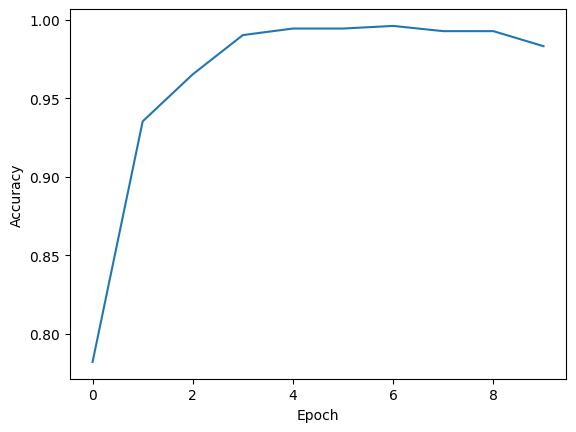

In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(784),

  #tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 3s 34ms/step - loss: 0.6705 - accuracy: 0.7858
Epoch 2/10
75/75 [==============================] - 3s 42ms/step - loss: 0.1941 - accuracy: 0.9442
Epoch 3/10
75/75 [==============================] - 4s 47ms/step - loss: 0.0869 - accuracy: 0.9762
Epoch 4/10
75/75 [==============================] - 3s 39ms/step - loss: 0.0382 - accuracy: 0.9900
Epoch 5/10
75/75 [==============================] - 3s 35ms/step - loss: 0.0239 - accuracy: 0.9912
Epoch 6/10
75/75 [==============================] - 4s 49ms/step - loss: 0.0170 - accuracy: 0.9954
Epoch 7/10
75/75 [==============================] - 3s 35ms/step - loss: 0.0161 - accuracy: 0.9958
Epoch 8/10
75/75 [==============================] - 2s 31ms/step - loss: 0.0400 - accuracy: 0.9862
Epoch 9/10
75/75 [==============================] - 2s 29ms/step - loss: 0.0473 - accuracy: 0.9854
Epoch 10/10
75/75 [==============================] - 2s 31ms/step - loss: 0.0741 - accuracy: 0.9750
19/19 - 0

[0.5875096917152405, 0.9116666913032532]

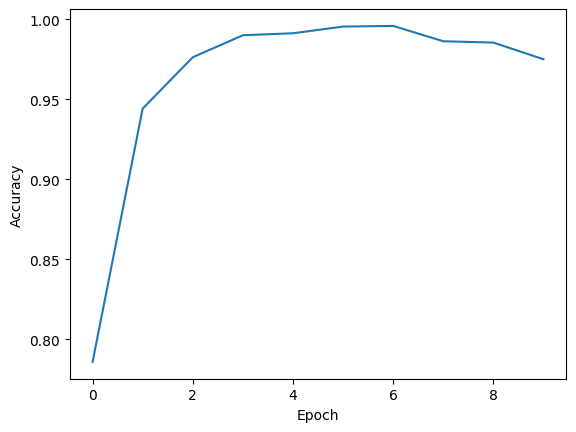

In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(1024),

  #tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 2s 9ms/step - loss: 0.6523 - accuracy: 0.7912
Epoch 2/10
75/75 [==============================] - 1s 9ms/step - loss: 0.2665 - accuracy: 0.9192
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.1524 - accuracy: 0.9538
Epoch 4/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0693 - accuracy: 0.9800
Epoch 5/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0276 - accuracy: 0.9921
Epoch 6/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0152 - accuracy: 0.9962
Epoch 7/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0189 - accuracy: 0.9950
Epoch 8/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 9/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0764 - accuracy: 0.9800
Epoch 10/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0617 - accuracy: 0.9792
19/19 - 0s - loss:

[0.44046446681022644, 0.9133333563804626]

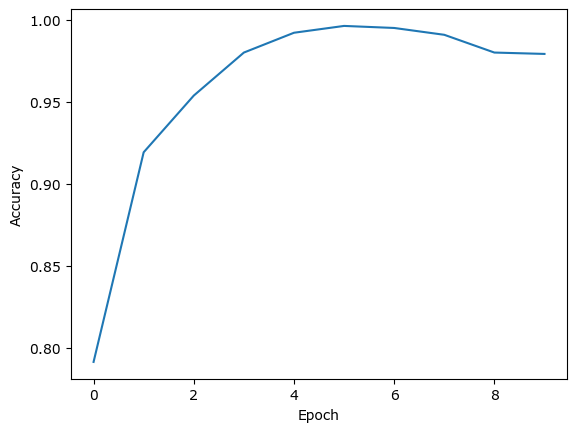

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(256),

  tf.keras.layers.Dense(128),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 2s 19ms/step - loss: 0.6733 - accuracy: 0.7842
Epoch 2/10
75/75 [==============================] - 1s 20ms/step - loss: 0.2108 - accuracy: 0.9300
Epoch 3/10
75/75 [==============================] - 1s 20ms/step - loss: 0.1469 - accuracy: 0.9500
Epoch 4/10
75/75 [==============================] - 2s 23ms/step - loss: 0.0721 - accuracy: 0.9800
Epoch 5/10
75/75 [==============================] - 2s 27ms/step - loss: 0.0619 - accuracy: 0.9787
Epoch 6/10
75/75 [==============================] - 1s 18ms/step - loss: 0.0717 - accuracy: 0.9787
Epoch 7/10
75/75 [==============================] - 1s 18ms/step - loss: 0.0900 - accuracy: 0.9688
Epoch 8/10
75/75 [==============================] - 1s 18ms/step - loss: 0.0617 - accuracy: 0.9796
Epoch 9/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0407 - accuracy: 0.9854
Epoch 10/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0795 - accuracy: 0.9792
19/19 - 0

[0.4418134093284607, 0.9316666722297668]

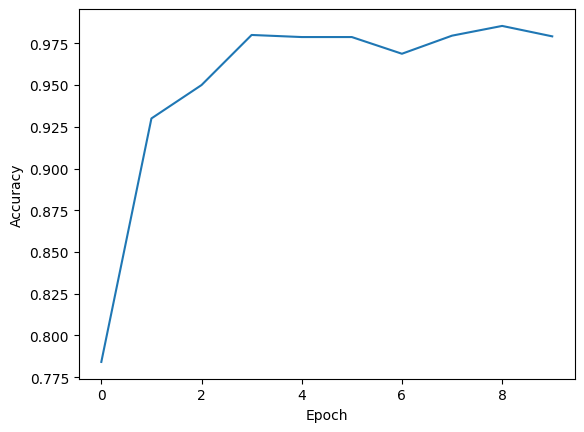

In [37]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(516),

  tf.keras.layers.Dense(256),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 1s 5ms/step - loss: 0.6822 - accuracy: 0.7850
Epoch 2/10
75/75 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.9171
Epoch 3/10
75/75 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9650
Epoch 4/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0646 - accuracy: 0.9821
Epoch 5/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9921
Epoch 6/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 7/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 8/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.9946
Epoch 9/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 10/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.9937
19/19 - 0s - loss: 

[0.44958731532096863, 0.9133333563804626]

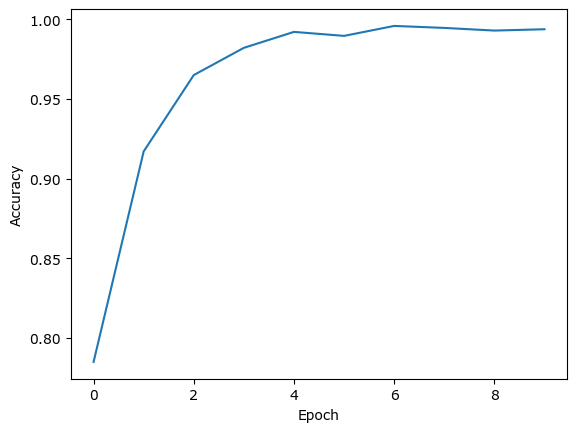

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(128),

  tf.keras.layers.Dense(128),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
75/75 [==============================] - 2s 9ms/step - loss: 0.6956 - accuracy: 0.7837
Epoch 2/10
75/75 [==============================] - 1s 9ms/step - loss: 0.2776 - accuracy: 0.9150
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.1568 - accuracy: 0.9542
Epoch 4/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0851 - accuracy: 0.9746
Epoch 5/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0435 - accuracy: 0.9871
Epoch 6/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 7/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0169 - accuracy: 0.9962
Epoch 8/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 9/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 10/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0562 - accuracy: 0.9854
19/19 - 0s - loss: 

[0.5374351739883423, 0.9066666960716248]

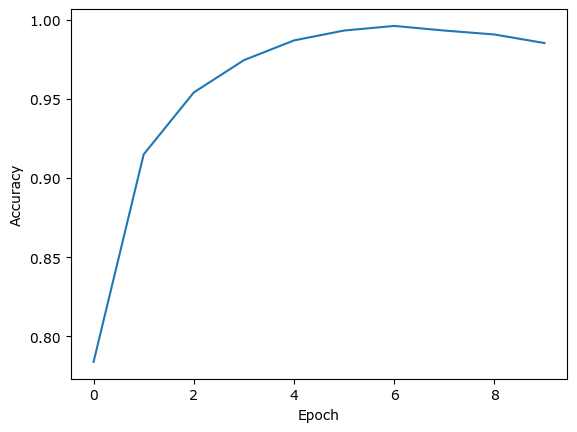

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784,activation='relu'),


  tf.keras.layers.Dense(200),

  tf.keras.layers.Dense(100),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['speed'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.evaluate(x_test,  y_test, verbose=2)

In [38]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784),
  tf.keras.layers.Dense(256, activation='relu'),

  #tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [39]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

In [40]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
75/75 [==============================] - 1s 8ms/step - loss: 1.6910 - accuracy: 0.5367
Epoch 2/15
75/75 [==============================] - 1s 8ms/step - loss: 0.9955 - accuracy: 0.7725
Epoch 3/15
75/75 [==============================] - 1s 9ms/step - loss: 0.7460 - accuracy: 0.8125
Epoch 4/15
75/75 [==============================] - 1s 8ms/step - loss: 0.6153 - accuracy: 0.8392
Epoch 5/15
75/75 [==============================] - 1s 8ms/step - loss: 0.5451 - accuracy: 0.8621
Epoch 6/15
75/75 [==============================] - 1s 8ms/step - loss: 0.4905 - accuracy: 0.8742
Epoch 7/15
75/75 [==============================] - 1s 9ms/step - loss: 0.4533 - accuracy: 0.8817
Epoch 8/15
75/75 [==============================] - 1s 9ms/step - loss: 0.4308 - accuracy: 0.8858
Epoch 9/15
75/75 [==============================] - 1s 8ms/step - loss: 0.3945 - accuracy: 0.8883
Epoch 10/15
75/75 [==============================] - 1s 9ms/step - loss: 0.3731 - accuracy: 0.8963
Epoch 11/15
75/75 [

In [42]:
model.evaluate(x_test,  y_test, verbose=2)

19/19 - 0s - loss: 0.3757 - accuracy: 0.9050 - 341ms/epoch - 18ms/step


[0.3757390081882477, 0.9049999713897705]